# Анализ успеха игровых платформ

Анализ рынка игровых платформ в Европе, Северной Америке и Японии для определения потенциально популярных игровых жанров и платформ в регионах и планирования рекламной кампании.

По историческим данным о продажах игр в различных регионах до 2016 года необходимо спланировать рекламную кампанию игрового сервиса на 2017 год

**Необходимо**:

- выявить определяющие успешность игры закономерности
- определить топ-5 популяных платформ
- определить топ-5 популярных жанров
- исследовать влияние рейтинга критиков и оценки пользователей на продажи игр
- проверить гипотезы о различии пользовательских рейтингов для разных платформ и жанров


### Описание данных

В проекте используются данные до 2016 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Изучение и предобработка данных

Испортируем все необходимые библиотеки и посмотрим на данные.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [ ]:
data = pd.read_csv('.../games.csv')

In [ ]:
data.head(10) #посмотрим на данные

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Изучим описание данных:

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Проверим таблицу на явные дубликаты.

In [ ]:
data.duplicated().sum()

0

Явных дубликатов нет. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

Приведем названия столбцов к нижнему регистру.

In [ ]:
data.columns = map(str.lower, data.columns)

In [ ]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Изучим инфрмацию о типах данных и приведем все столбцы к нужному типу.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим, что необходимо заменить типы данных:
- в `year_of_release` на int, так как дробная часть нам не нужна.
- в `user_score` на float, ведь оценки могут быть дробными.


Но для того, чтобы это сделать, нам нужно обработать пропуски.

In [ ]:
data[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Обращаем внимение на значение "tbd" в колонке `user_score`. Данных в этих колонках мало — всего 269 строк. А так как год принцптпиально важен для нашего анализа — удалим эти строки.

In [ ]:
data = data.dropna(subset = ['year_of_release'])
len(data[data['year_of_release'].isnull()])

0

Теперь приведем тип данных к int.

In [ ]:
data.year_of_release = data.year_of_release.astype('int')

In [ ]:
data.tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [ ]:
data.reset_index(drop= True , inplace= True ) #сбросим индексы

Приведем колокнку user_score к float. Но для этого нам нужно обработать значение 'tbd', что расшифровывается как "to be describe/determined" — "будет определено позднее". В начале посмотрим как много tbd в датасете.

In [ ]:
len(data.query('user_score == "tbd"'))

2376

2376 — это много. Заменим 'tbd' на NaN, т.к. по смыслу это одно и то же.


In [ ]:
data.loc[data['user_score'] =='tbd','user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')

Проверим, что типы данных изменились и завершим обработку пропусков.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Пропуски обнаружены в 4 колонках:
- `name` - 2 пропуска
- `critic_score` - 8463 пропусков
- `user_score`- 8983 пропусков
- `rating`- 6678 пропусков

In [ ]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Колонки с пропусками в `name` практические пустые, можно их удалить.

In [ ]:
data = data.dropna(subset = ['name'])

In [ ]:
data.reset_index(drop= True , inplace= True )

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


В `critic_score` и `user_score` много пропусков, но нет способа корректной замены такого количество значений.
В `rating` мы имеем категориальную переменную. Исследуем ее подробнее.

In [ ]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Видим 4 крупные категории и 4 незначительные. Объединим/удалим минорные категории.

- `EC` - это игры для детей младшего возраста. Удилим такие игры из данных
- `RP` - "рейтинг ожидается". Удалим и такую строку.
- `K-A` ("Kids to Adults") — заменим на E ('для всех возрастов')
- `AO` - только для взрослых заменим на M ('для взрослых')

In [ ]:
data = data[data.rating != 'EC']
data = data[data.rating != 'RP']
data.loc[data['rating'] == 'AO', 'rating'] = 'M'
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

Пропуски в столбце "rating" заменим на "unknown'.


In [ ]:
data['rating'] = data['rating']. fillna ('unknown')

Посмотрим 10 случайных строк таблицы, что проверить как сработала замена.

In [ ]:
data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11774,Mahjong Fight Club DS: Wi-Fi Taiou,DS,2006,Misc,0.00,0.00,0.07,0.00,NaN,NaN,unknown
14870,Kensei: Sacred Fist,PS,1997,Fighting,0.01,0.01,0.00,0.00,NaN,NaN,unknown
15310,Natsuiro High School: Seishun Hakusho,PS4,2015,Action,0.00,0.00,0.02,0.00,NaN,NaN,unknown
2854,NCAA Football 09,X360,2008,Sports,0.65,0.00,0.00,0.05,83.0,7.7,E
3217,NFL Quarterback Club 99,N64,1998,Sports,0.59,0.02,0.00,0.00,NaN,NaN,unknown
1422,Samurai Warriors,PS2,2004,Action,0.22,0.05,1.06,0.02,73.0,8.7,T
5381,Untold Legends: The Warriors Code,PSP,2006,Role-Playing,0.14,0.12,0.00,0.08,65.0,8.3,T
1418,Gardening Mama,DS,2009,Puzzle,0.79,0.42,0.01,0.13,60.0,9.3,E
11290,The Italian Job,XB,2003,Racing,0.06,0.02,0.00,0.00,54.0,5.8,T
3239,Plants vs. Zombies: Garden Warfare,PS4,2014,Shooter,0.21,0.29,0.01,0.10,75.0,7.6,E10+


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16435 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16435 non-null  object 
 1   platform         16435 non-null  object 
 2   year_of_release  16435 non-null  int64  
 3   genre            16435 non-null  object 
 4   na_sales         16435 non-null  float64
 5   eu_sales         16435 non-null  float64
 6   jp_sales         16435 non-null  float64
 7   other_sales      16435 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7461 non-null   float64
 10  rating           16435 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
data['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [ ]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### Выводы
- Привели названия столбцов к нижднему регистру;
- Преобразуйте данные в нужные типы. Столбец `year_of_release` привели int, так как дробная часть нам не нужна, а `user_score` к float, ведь оценки могут быть дробными.
- Исследовали колонку `rating` — объеденили редкие категории с крупными, пропуски заменили на 'unknown'. Также заменили 'tbd' в столбце с оценкой пользователей на NaN.
- Обнаружили большое количество пропусков в `critic_score`, `user_score`. Оставили как есть, т.к. их нечем заменить.
- Посчитали суммарные продажи во всех регионах и запишите их в отдельный столбец.

### Исследовательский анализ данных

**План исследования**:

- Изучить, сколько игр будет выпускаться в разные годы.

- Рассмотреть за какой срок в среднем появляются и теряют популярность платформы.

- На основе динамики продаж выбрать самые перспективные платформы.

- Рассмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

- Изучить общее распределение игр по жанрам. Выяснить самые потенциально прибыльные жанры в разных странах.



Посмотрим, сколько игр выпускалось в разные годы и решим за какие периоды важны данные.

In [ ]:
data['year_of_release'].value_counts()

2008    1427
2009    1425
2010    1251
2007    1197
2011    1134
2006    1006
2005     937
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

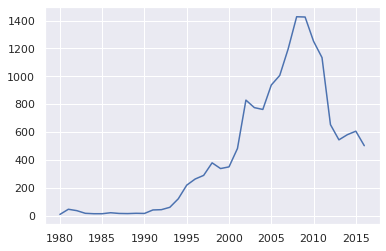

In [ ]:
sns.set_theme()
data['year_of_release'].value_counts().sort_index().plot();






Количество игр удваивается после 1993, до этого игр выпускалось относительно мало. Так как нам нужны в первую очередь актуальные данные, возьмем данные с 1994

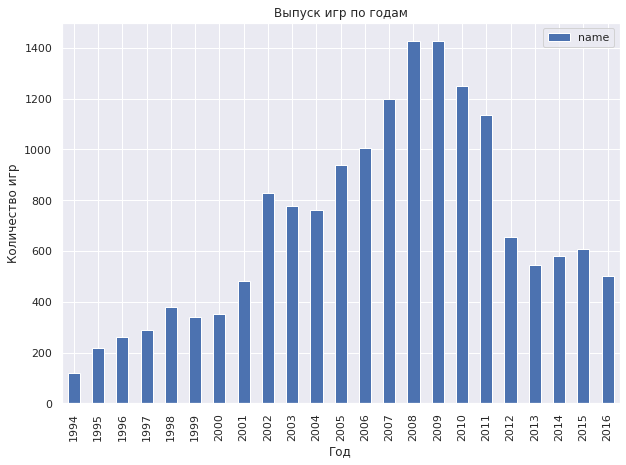

In [ ]:
years_groupby = data.groupby('year_of_release').agg({'name':'count'});
years_groupby.query('year_of_release > 1993').plot(y = 'name', kind= 'bar', figsize = (10,7))
plt.title('Выпуск игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр');

Посмотрим, как менялись продажи по платформам. Найдем 10 самых популярных пофлтформ по объему продаж;

In [ ]:
top10_platforms = data.groupby('platform').agg({'total_sales':'sum'}).sort_values(by = 'total_sales', ascending = False)
top10_platforms


,total_sales
platform,
PS2,1233.32
X360,961.24
PS3,931.34
Wii,890.52
DS,802.13
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Создадим список с топом 10 платформ.

In [ ]:
top10_platforms_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

Посмтроим сводную таблицу с плафтормами и продажами по годам.

In [ ]:
platform_pt_years = data.pivot_table(index=['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum')
platform_pt_years

total_sales
platform year_of_release             
2600     1980                   11.38
         1981                   35.68
         1982                   28.88
         1983                    5.84
         1984                    0.27
...                               ...
XB       2008                    0.18
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

[238 rows x 1 columns]

In [ ]:
platform_pt_years['years'] =  platform_pt_years.index
platform_pt_years['years'] = platform_pt_years['years'].apply (lambda row: row[1]).astype('int')

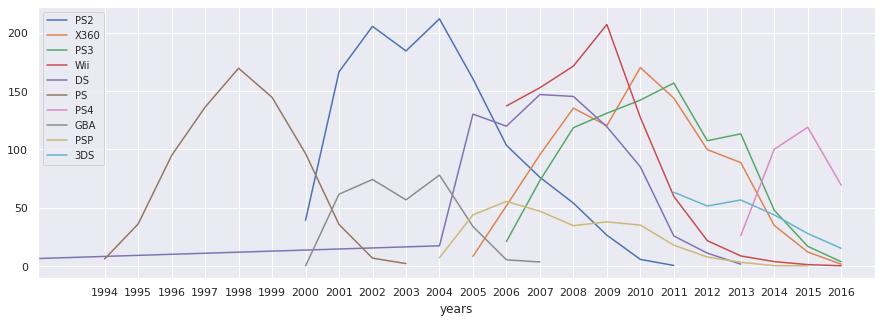

In [ ]:
fig, ax = plt.subplots(figsize =(15,5))

for platform in top10_platforms_list:
    platform_pt_years.loc[platform].plot('years','total_sales', ax=ax)

ax.legend(top10_platforms_list,prop = {'size':10})
ax.set_xlim([1992,2017])
ax.set_xticks(np.arange(1994,2017))
ax.set_xticklabels(range(1994,2017))
plt.show()

Можем увидеть интерсесную закономерность: практически у всех платформ есть цикл жизни:
- после их создания они через несколько лет выходят на пико продаж (ps2 сделала это быстрее)
- после этого в течение 3-4 лет продажи идут на спад.

Визуально кажется, что цикл жизни платформы составляет около 10 лет, но посмотри более точно.

Посмотрим какое среднее количество лет с релизами у каждой платформы.
Уберем из рассмотрения те платформы, у которых были релизы в 2016 году.

In [ ]:
platform_life_cycle = data.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_life_cycle['years_of_life'] = platform_life_cycle['max'] - platform_life_cycle['min']
average_years_of_life = platform_life_cycle[platform_life_cycle['max'] != 2016]['years_of_life'].mean()

min            year_of_release    1993.863636
max            year_of_release    2000.863636
years_of_life                        7.000000
dtype: float64

Таким образом среднее время жизни платформы — 7 лет. Кроме pc, pc — вечно :)


Определим актуальный период как 2014-2016 — за него и  будем исследовать данные. Это эпоха, когда закончилась эпоха ps3 и началась ps4.

In [ ]:
actual_data = data.query('2014 <= year_of_release <= 2016')

In [ ]:
actual_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,unknown,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


Определим какие платформы лидируют по продажам и их динамику продаж. Выберем несколько потенциально прибыльных платформ.

Посмотрим продажи игр по плафтормам в актуальном периоде.

In [ ]:
actual_platform_total = actual_data.groupby('platform')['total_sales'].sum()
actual_platform_total.sort_values(ascending=False)


platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

Посмотрим в процентах долю продаж по платформам.

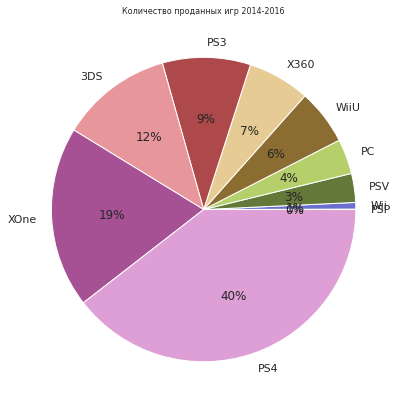

In [ ]:
actual_platform_total.sort_values().plot(kind='pie', grid=True, figsize=(7,7), colormap = 'tab20b', autopct='%1.0f%%')
plt.title ('Количество проданных игр 2014-2016', fontsize = 8)
plt.ylabel ('');


Ps4 — янвый лидер!

In [ ]:
actual_data_pt = actual_data.pivot_table(index = ['year_of_release','platform'], values = 'total_sales', aggfunc = 'sum')

In [ ]:
actual_data_pt

total_sales
year_of_release platform             
2014            3DS             43.76
                PC              13.28
                PS3             47.76
                PS4            100.00
                PSP              0.24
                PSV             11.90
                Wii              3.75
                WiiU            22.03
                X360            34.74
                XOne            54.07
2015            3DS             27.78
                PC               8.52
                PS3             16.82
                PS4            118.90
                PSP              0.12
                PSV              6.25
                Wii              1.14
                WiiU            16.35
                X360            11.96
                XOne            60.14
2016            3DS             15.14
                PC               5.25
                PS3              3.60
                PS4             69.25
                PSV              4.25
                Wii              0.18
                WiiU             4.60
                X360             1.52
                XOne            26.15

In [ ]:
pivot_table_index = actual_data_pt.index.to_list()

In [ ]:
actual_data_pt["years"] = [year for year, platform in pivot_table_index]

In [ ]:
actual_data_pt.index = [platform for year, platform in pivot_table_index]

Т.к данные за 2016 годы были не полными, посмотрим график продаж по платформам в разрезе двух лет: 2014 и 2015.

In [ ]:
actual_data_1415 = actual_data_pt[actual_data_pt['years'] != 2016]

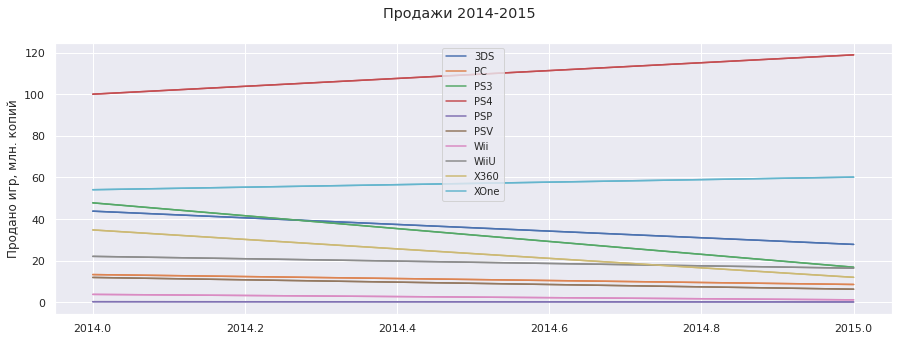

In [ ]:
fig, ax = plt.subplots(figsize =(15,5))
for platform in actual_data_1415.index:
    ax.plot(actual_data_1415.loc[platform]['years'],actual_data_1415.loc[platform]['total_sales'])

ax.legend(actual_data_1415.index.unique(),prop = {'size':10})
fig.suptitle('Продажи 2014-2015')
ax.set_ylabel('Продано игр, млн. копий')
plt.show()

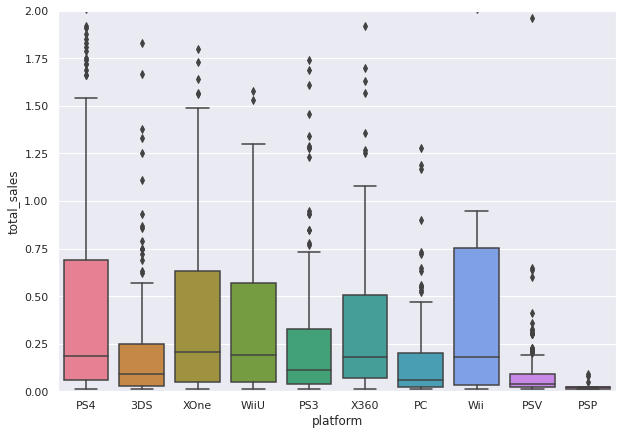

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=actual_data, x='platform', y='total_sales', palette="husl")
plt.ylim([0,2]);

Посмотрим подробнее на релизы на `Wii`.

In [ ]:
actual_data.query('platform == "Wii"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
839,Just Dance 2015,Wii,2014,Misc,0.99,0.85,0.0,0.17,NaN,8.4,E10+,2.01
2151,Just Dance 2016,Wii,2015,Misc,0.41,0.46,0.0,0.08,NaN,NaN,E10+,0.95
2152,Skylanders: Trap Team,Wii,2014,Action,0.41,0.46,0.0,0.08,NaN,NaN,E10+,0.95
3561,FIFA 15,Wii,2014,Sports,0.15,0.37,0.0,0.04,NaN,4.3,E,0.56
7867,How to Train Your Dragon 2,Wii,2014,Adventure,0.04,0.13,0.0,0.01,NaN,NaN,E10+,0.18
7885,Just Dance 2017,Wii,2016,Misc,0.06,0.11,0.0,0.01,NaN,NaN,E10+,0.18
8800,Skylanders: SuperChargers,Wii,2015,Action,0.02,0.12,0.0,0.01,NaN,NaN,unknown,0.15
13359,Disney Planes Fire & Rescue,Wii,2014,Action,0.00,0.04,0.0,0.00,NaN,NaN,unknown,0.04
14451,Barbie and Her Sisters Puppy Rescue,Wii,2015,Action,0.00,0.03,0.0,0.00,NaN,NaN,E,0.03
15885,Penguins of Madagascar,Wii,2014,Action,0.00,0.01,0.0,0.00,NaN,NaN,E,0.01


**Вывод**:
- Лучшие объема продаж за актуальный период у PS4 и XOne. За ними идут 3DS, PS3, X360, WiiU.
- Но переспективными из них можно считать PS4 и XOne, потому что только у них растут продажи. У остальных платформ — падают.
- На боксплоте платформа Wii кажется переспективной — у нее высокая медиана продаж и низкая дисперсия.Но это связано с тем, что в актуальном периоде продаж у Wii было мало. Распределение вверх сдвинул хит "Just Dance". Поэтому относить ее к переспективной не будем.











Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
Возьмем для примера платформу XOne и посмотрим связь с рейтигом критиков.

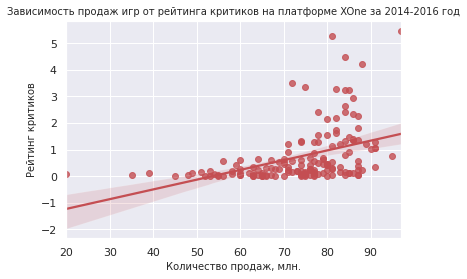

In [ ]:
x_one = actual_data.query('platform == "XOne"')

sns.regplot(x=x_one["critic_score"], y=x_one["total_sales"], color = 'r')
plt.title ('Зависимость продаж игр от рейтинга критиков на платформе XOne за 2014-2016 год', fontsize = 10)
plt.xlabel ('Количество продаж, млн.', fontsize = 10)
plt.ylabel ('Рейтинг критиков', fontsize = 10);

А теперь изучим связь с рейтингом игроков.

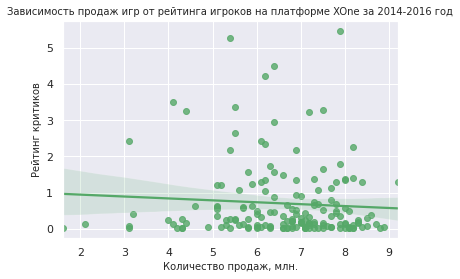

In [ ]:
x_one = actual_data.query('platform == "XOne"')

sns.regplot(x=x_one["user_score"], y=x_one["total_sales"], color = 'g')
plt.title ('Зависимость продаж игр от рейтинга игроков на платформе XOne за 2014-2016 год', fontsize = 10)
plt.xlabel ('Количество продаж, млн.', fontsize = 10)
plt.ylabel ('Рейтинг критиков', fontsize = 10);

Визуально обнаруживатеся следующий тренд: рейтинг критиков связан с объемом продаж.
С ретингом игроков ситуация неоднозначная — из популярных игр есть как игры с высоким, так и с низким рейтингом.
Посчитаем корреляцию.

In [ ]:
#напишем функцию, которая инетрпретирует коэффицент Пирсона по шкале Чеддока
def p_estimator(p):
    p = abs(p)
    if p > 0 and p <= 0.3:
        return 'очень слабая'
    if p > 0.3 and p <= 0.5:
        return 'слабая'
    if p > 0.5 and p <= 0.7:
        return 'средняя'
    if p > 0.7 and p <= 0.9:
        return "сильная"
    if p > 0.9:
        return "очень сильная"
    else:
        return "неустановлена"

In [ ]:
x_one_critic_score = actual_data.query('platform == "XOne"')['critic_score']
x_one_user_score = actual_data.query('platform == "XOne"')['user_score']
x_one_total_sales = actual_data.query('platform == "XOne"')['total_sales']


p = x_one_critic_score.corr(x_one_total_sales)
print(f"Коэффицент корреляции между двумя рейтингом критиков и продажами игры {p}, связь {p_estimator(p)}.")



Коэффицент корреляции между двумя рейтингом критиков и продажами игры 0.42867694370333226, связь слабая.


In [ ]:
p = x_one_user_score.corr(x_one_total_sales)
print(f"Коэффицент корреляции между двумя рейтингом игроков и продажами игры {p}, связь {p_estimator(p)}.")

Коэффицент корреляции между двумя рейтингом игроков и продажами игры -0.0703839280647581, связь очень слабая.


<b>Вывод</b>: Оценка критиков слабо обратно пропорционально коррелирует с объемом продаж игры. Но о причинности говорить нельзя.
Возможно, хвалебные отцывы повышают продажи, возможно высокие продажи вызывают хвалебные отзывы.
Но, скорее всего, и отзывы и продажы связаны с третьей переменной — качеством самой игры.

Между оценкой игроков и объемом продажи игр, как ни странно, связь очень слабая.


Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [ ]:
#посчитаем корреляцияю по платформам для перспективных платформ
perspective_platforms_list = ['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU']

for name in perspective_platforms_list:
    critic_score = actual_data.query('platform == @name')['critic_score']
    user_score = actual_data.query('platform == @name')['user_score']
    total_sales = actual_data.query('platform == @name')['total_sales']

    p_critic = critic_score.corr(total_sales)
    p_user = user_score.corr(total_sales)

    print('Платформа:', name)
    print(f"Коэффицент корреляции c рейтингом критиков {p_critic}, связь {p_estimator(p_critic)}.")
    print(f"Коэффицент корреляции c рейтингом игроков {p_user}, связь {p_estimator(p_user)}.")
    print('')



Платформа: PS4
Коэффицент корреляции c рейтингом критиков 0.40266141068104083, связь слабая.
Коэффицент корреляции c рейтингом игроков -0.040131589472697356, связь очень слабая.

Платформа: XOne
Коэффицент корреляции c рейтингом критиков 0.42867694370333226, связь слабая.
Коэффицент корреляции c рейтингом игроков -0.0703839280647581, связь очень слабая.

Платформа: 3DS
Коэффицент корреляции c рейтингом критиков 0.314117492869051, связь слабая.
Коэффицент корреляции c рейтингом игроков 0.2151932718527028, связь очень слабая.

Платформа: PS3
Коэффицент корреляции c рейтингом критиков 0.44657460493190704, связь слабая.
Коэффицент корреляции c рейтингом игроков -0.16676141347662118, связь очень слабая.

Платформа: X360
Коэффицент корреляции c рейтингом критиков 0.5257228356581523, связь средняя.
Коэффицент корреляции c рейтингом игроков -0.138444570945665, связь очень слабая.

Платформа: WiiU
Коэффицент корреляции c рейтингом критиков 0.370201412480884, связь слабая.
Коэффицент корреляции 

Вывод:
В целом, ситуация похожа — отзывы критиков коррелируют с объемом продаж игр.


Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [ ]:
genre_pt = actual_data.groupby('genre')['total_sales'].sum()
genre_pt.columns = ['проданные копии']
genre_pt = genre_pt.sort_values()

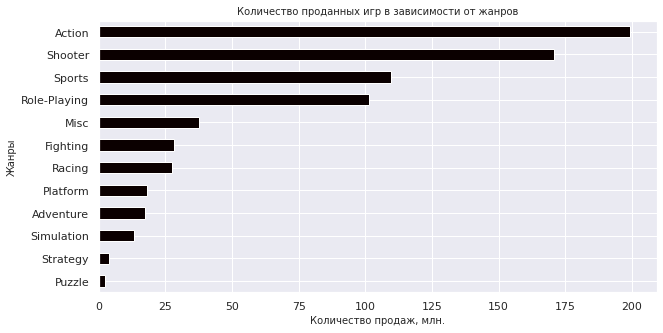

In [ ]:
genre_pt.plot(kind='barh', grid=True, figsize=(10,5), colormap = 'hot')
plt.title ('Количество проданных игр в зависимости от жанров', fontsize = 10)
plt.xlabel ('Количество продаж, млн.', fontsize = 10)
plt.ylabel ('Жанры', fontsize = 10);

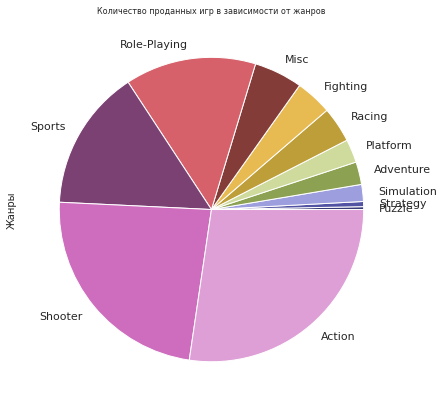

In [ ]:
genre_pt.plot(kind='pie', grid=True, figsize=(7,7), colormap = 'tab20b')
plt.title ('Количество проданных игр в зависимости от жанров', fontsize = 8)
plt.ylabel ('Жанры', fontsize = 10);

Посмотрим медианное количество проданных копий для игры каждого жанра.

In [ ]:
genre_pt_median = actual_data.groupby('genre')['total_sales'].median()
genre_pt_median.columns = ['проданные копии']
genre_pt_median

genre
Action          0.090
Adventure       0.030
Fighting        0.125
Misc            0.090
Platform        0.140
Puzzle          0.045
Racing          0.090
Role-Playing    0.110
Shooter         0.515
Simulation      0.100
Sports          0.180
Strategy        0.060
Name: total_sales, dtype: float64

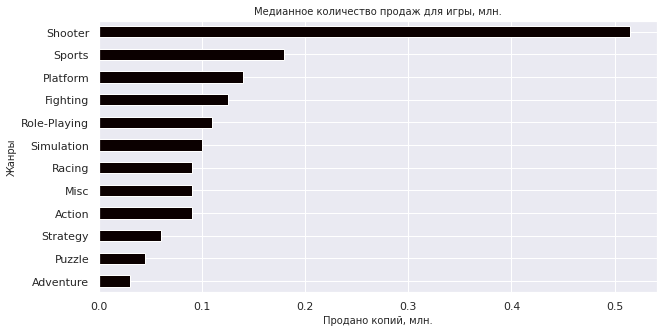

In [ ]:
genre_pt_median.sort_values().plot(kind='barh', grid=True, figsize=(10,5), colormap = 'hot')
plt.title ('Медианное количество продаж для игры, млн.', fontsize = 10)
plt.xlabel ('Продано копий, млн.', fontsize = 10)
plt.ylabel ('Жанры', fontsize = 10);

- Action и Shooter — бесспорные лидеры по количеству продаж. На них вместе приходится больше половины рынка.
- Спортивные игры и RPG вместе занимают четверть рынка.
- Оставшуюся четверть приходится на другие жанры.
- Хуже всего продаются паззлы и стратегии.

- На обьем продаж влияет количество релизов игр, поэтому мы построили график медианных значений количества продаж.
- Из него мы видим, что Action хоть и лидирует по общему количеству продаж на рынке, но в среднем отдельная игра продается хуже других жанров. Лучше всего продаются шутеры.


### Составление портрета пользователя каждого региона
Определим для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.

- Самые популярные жанры (топ-5). Поясните разницу.

- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
rating_pt = actual_data.pivot_table(index = 'platform', values = ['na_sales','jp_sales','eu_sales', 'total_sales'],
                                             aggfunc = ['sum'])
rating_pt.columns = ['na_sales','jp_sales','eu_sales', 'total_sales']
rating_pt


,na_sales,jp_sales,eu_sales,total_sales
platform,,,,
3DS,16.12,44.24,22.64,86.68
PC,17.97,0.00,7.23,27.05
PS3,25.54,11.22,22.05,68.18
PS4,130.04,15.02,98.61,288.15
PSP,0.00,0.36,0.00,0.36
PSV,3.53,14.54,2.52,22.40
Wii,2.59,0.00,2.08,5.07
WiiU,13.15,7.31,19.36,42.98
X360,15.49,0.08,28.30,48.22


In [ ]:
top5_plat_na = rating_pt.sort_values(by='na_sales', ascending = False)
top5_plat_na['na_part'] = top5_plat_na['na_sales'] / top5_plat_na['total_sales']*100
top5_plat_na.head(5)

,na_sales,jp_sales,eu_sales,total_sales,na_part
platform,,,,,
PS4,130.04,15.02,98.61,288.15,45.129273
XOne,46.25,0.32,81.27,140.36,32.950983
PS3,25.54,11.22,22.05,68.18,37.459666
PC,17.97,0.00,7.23,27.05,66.432532
3DS,16.12,44.24,22.64,86.68,18.597139


В Северной Америке доминируют PS4, XOne и PS3. А еще продаже игр на pc на 66% приходятся на Северную Америку.

In [ ]:
top5_plat_eu = rating_pt.sort_values(by='eu_sales', ascending = False)
top5_plat_eu['eu_part'] = top5_plat_eu['eu_sales'] / top5_plat_eu['total_sales']*100
top5_plat_eu.head(5)

,na_sales,jp_sales,eu_sales,total_sales,eu_part
platform,,,,,
PS4,130.04,15.02,98.61,288.15,34.221760
XOne,46.25,0.32,81.27,140.36,57.901111
X360,15.49,0.08,28.30,48.22,58.689341
3DS,16.12,44.24,22.64,86.68,26.119059
PS3,25.54,11.22,22.05,68.18,32.340862


В Европе не так популярен pc, как в северной Америке. Но разница по структуре популярности игр невелика.

In [ ]:
top5_plat_jp = rating_pt.sort_values(by='jp_sales', ascending = False)
top5_plat_jp['jp_part'] = top5_plat_jp['jp_sales'] / top5_plat_jp['total_sales']*100
top5_plat_jp.head(5)

,na_sales,jp_sales,eu_sales,total_sales,jp_part
platform,,,,,
3DS,16.12,44.24,22.64,86.68,51.038302
PS4,130.04,15.02,98.61,288.15,5.212563
PSV,3.53,14.54,2.52,22.40,64.910714
PS3,25.54,11.22,22.05,68.18,16.456439
WiiU,13.15,7.31,19.36,42.98,17.007911


Самая популярная в Японии платформа — 3DS. Продажи в Японии занимают 51% от всего мирового рынка
На втором месте PS4, но приставка настолько популярна в мире, что продажи в Японии занимают только 5% мирового рынка
На третьем месте PSV и снова рекордные объемы продаж — 64%

Интересно то, что 3DS и PSV — портативные приставки.

<b>Вывод</b>: Япония — необычный регион, где любят портативные приставки.


Посмотрим самые популярные жанры в разных частях света.

In [ ]:
genre_pivot_table = actual_data.pivot_table(index = 'genre', values = ['na_sales','jp_sales','eu_sales', 'total_sales'],
                                             aggfunc = ['sum'])
genre_pivot_table.columns = ['na_sales','jp_sales','eu_sales', 'total_sales']
genre_pivot_table

,na_sales,jp_sales,eu_sales,total_sales
genre,,,,
Action,74.68,29.58,72.53,199.36
Adventure,6.49,3.60,5.64,17.55
Fighting,6.69,6.37,12.43,28.22
Misc,12.86,5.61,15.05,37.55
Platform,6.80,2.69,6.79,18.09
Puzzle,0.52,0.93,0.65,2.21
Racing,14.13,1.76,8.74,27.52
Role-Playing,28.17,31.16,33.47,101.44
Shooter,65.52,4.87,79.02,170.94


In [ ]:
top5_genre_eu = genre_pivot_table.sort_values(by='eu_sales', ascending = False)
top5_genre_eu.head(5)

,na_sales,jp_sales,eu_sales,total_sales
genre,,,,
Shooter,65.52,4.87,79.02,170.94
Action,74.68,29.58,72.53,199.36
Sports,45.73,3.26,46.13,109.48
Role-Playing,28.17,31.16,33.47,101.44
Misc,12.86,5.61,15.05,37.55


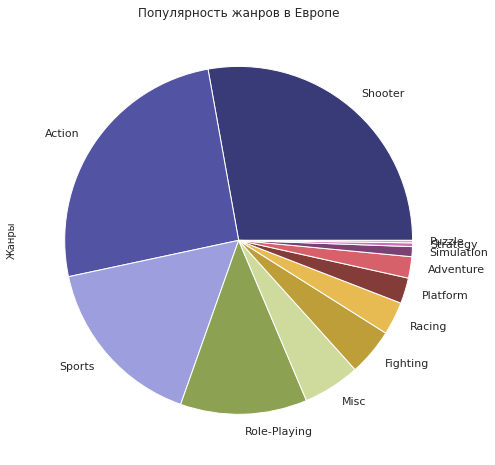

In [ ]:
top5_genre_eu['eu_sales'].plot(kind='pie',figsize=(8,8), colormap = 'tab20b')
plt.title ('Популярность жанров в Eвропе', fontsize = 12)
plt.ylabel ('Жанры', fontsize = 10);

In [ ]:
top5_genre_na = genre_pivot_table.sort_values(by='na_sales', ascending = False)
top5_genre_na.head(5)

,na_sales,jp_sales,eu_sales,total_sales
genre,,,,
Action,74.68,29.58,72.53,199.36
Shooter,65.52,4.87,79.02,170.94
Sports,45.73,3.26,46.13,109.48
Role-Playing,28.17,31.16,33.47,101.44
Racing,14.13,1.76,8.74,27.52


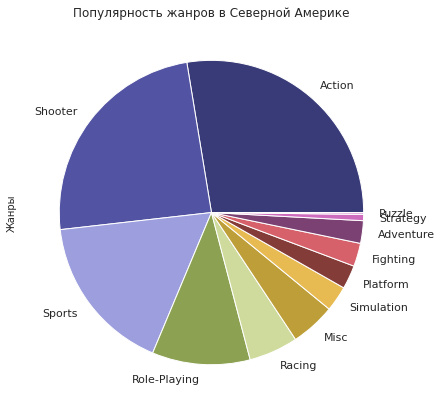

In [ ]:
top5_genre_na['na_sales'].plot(kind='pie',figsize=(7,7), colormap = 'tab20b')
plt.title ('Популярность жанров в Северной Америке', fontsize = 12)
plt.ylabel ('Жанры', fontsize = 10);

In [ ]:
top5_genre_jp = genre_pivot_table.sort_values(by='jp_sales', ascending = False)
top5_genre_jp.head(5)

,na_sales,jp_sales,eu_sales,total_sales
genre,,,,
Role-Playing,28.17,31.16,33.47,101.44
Action,74.68,29.58,72.53,199.36
Fighting,6.69,6.37,12.43,28.22
Misc,12.86,5.61,15.05,37.55
Shooter,65.52,4.87,79.02,170.94


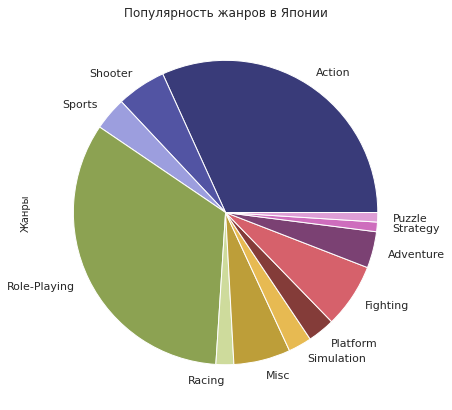

In [ ]:
top5_genre_na['jp_sales'].plot(kind='pie',figsize=(7,7), colormap = 'tab20b')
plt.title ('Популярность жанров в Японии', fontsize = 12)
plt.ylabel ('Жанры', fontsize = 10);

<b>Топ 5 игр в зависимости от региона:</b>

- Северная Америка: Action, Shooter, Sports, Role-Playing и Racing
- Европа: Shooter, Action , Sports, Role-Playing и Misc
- Япония: Role-Playing, Action, Fighting, Misc, и Shooter

Америка и Европа снова очень похожа за исключением небольших различий.
В Японии не так популярны шутеры, зато гораздо более популярны RPG.

Посмотрим как рейтинг ESRB влияет на продажи в отдельном регионе.

In [ ]:
esrb= actual_data.pivot_table(index = ['rating'],
                                           values = ['na_sales','jp_sales','eu_sales'],
                                           aggfunc = ['sum'])
esrb.columns = ['eu_sales','jp_sales','na_sales']
esrb

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
unknown,58.95,56.90,64.72


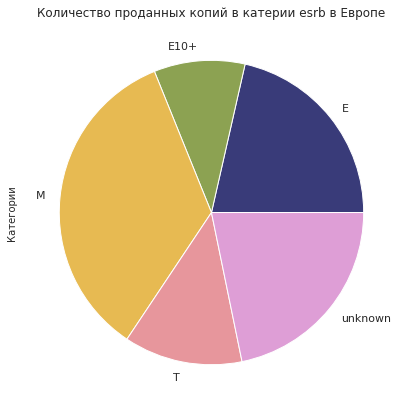

In [ ]:
esrb['eu_sales'].plot(kind='pie',figsize=(7,7), colormap = 'tab20b')
plt.title ('Количество проданных копий в катерии esrb в Европе', fontsize = 12)
plt.ylabel ('Категории', fontsize = 10);

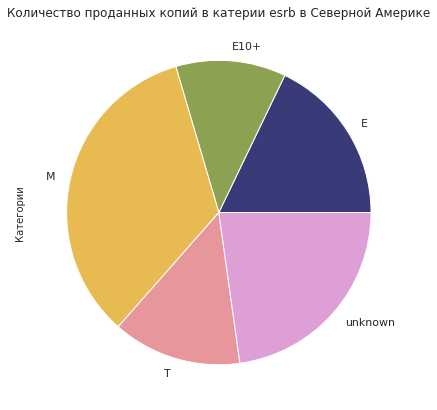

In [ ]:
esrb['na_sales'].plot(kind='pie',figsize=(7,7), colormap = 'tab20b')
plt.title ('Количество проданных копий в катерии esrb в Северной Америке', fontsize = 12)
plt.ylabel ('Категории', fontsize = 10);

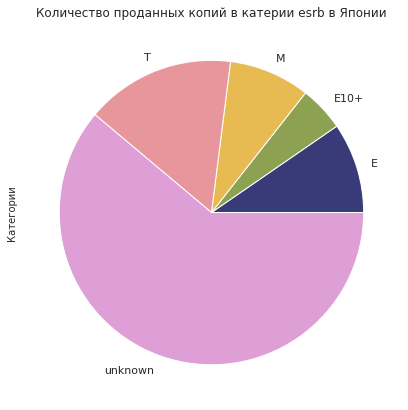

In [ ]:
esrb['jp_sales'].plot(kind='pie',figsize=(7,7), colormap = 'tab20b')
plt.title ('Количество проданных копий в катерии esrb в Японии', fontsize = 12)
plt.ylabel ('Категории', fontsize = 10);

Вывод:
- Америка и Европа снова похожи по оценкам. Более трети всех игр — для взрослых. Четверть — для всех.
- В Японии много  unknown. Видимо, у них своя система рейтинга. Это и объясняет пропущенные значения.

### Проверка гипотез

Сформулируем и проверим ряд гипотез:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


<b>Гипотеза 1</b>

<i>Нулевая гипотеза</i>: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

<i>Альтернативная гипотеза</i>: Средние пользовательские рейтинги платформ Xbox One и PC отличаются

Сделаем срез пользователских оценок по XOne и сбросим пустые строки.

In [ ]:
xbox = actual_data.query('platform == "XOne"')['user_score'].dropna()
xbox

165      7.9
179      5.4
241      6.4
269      6.2
372      4.1
        ... 
16273    6.8
16326    6.0
16359    8.2
16372    6.6
16389    6.7
Name: user_score, Length: 165, dtype: float64

Посмотрим средние и срез пользователских оценок по xOne и PC.

In [ ]:
xbox.mean()

6.594545454545456

In [ ]:
pc = actual_data.query('platform == "PC"')['user_score'].dropna()
pc

455      3.9
1515     5.4
1710     7.9
2273     5.7
2746     5.9
        ... 
16187    8.3
16193    6.8
16239    7.9
16248    1.4
16421    7.6
Name: user_score, Length: 122, dtype: float64

Посмотрим средние по PC.

In [ ]:
pc.mean()

6.298360655737705

In [ ]:
alpha = 0.05

result_first = st.ttest_ind(actual_data.query('platform == "XOne"')['user_score'].dropna(),
                            actual_data.query('platform == "PC"')['user_score'].dropna(),
                            equal_var=False)

prob_first = result_first.pvalue
print('р-значение: ', prob_first)
if prob_first < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


р-значение:  0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу.
Это означает, что нет оснований утверждать, что существует различе между средними выборок пользовательских оценок по XOne и PC .

Проверим гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<b>Гипотеза 2</b>

<i>Нулевая гипотеза</i> Средние пользовательские рейтинги жанров Action и Sports одинаковые.

<i>Альтернативна гипотеза</i>: Средние пользовательские рейтинги жанров Action и Sports разные.

Сделаем срез пользователских оценок по жанру action и сбросим пустые строки.

In [ ]:
action = actual_data.query('genre == "Action"')['user_score'].dropna()
action

42       8.3
165      7.9
230      8.1
294      6.3
303      4.9
        ... 
16273    6.8
16326    6.0
16381    8.5
16389    6.7
16421    7.6
Name: user_score, Length: 297, dtype: float64

In [ ]:
action.mean()

6.760606060606061

Сделаем срез пользователских оценок по жанру Sports и сбросим пустые строки.

In [ ]:
sports = actual_data.query('genre == "Sports"')['user_score'].dropna()
sports

77       4.3
94       5.0
143      5.7
263      4.5
313      6.7
        ... 
15861    6.3
15883    8.8
15887    6.9
16248    1.4
16372    6.6
Name: user_score, Length: 127, dtype: float64

In [ ]:
sports.mean()

5.2251968503937

In [ ]:
alpha = 0.05

result_second = st.ttest_ind(actual_data.query('genre == "Action"')['user_score'].dropna(),
                             actual_data.query('genre == "Sports"')['user_score'].dropna(),
                             equal_var=False)
prob_second = result_second.pvalue
print('р-значение: ',prob_second)
if prob_second < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


р-значение:  1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод**:
Средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые различия.

### Общий вывод

1.<b> Изучили и обработали данные:</b>
- Привели названия столбцов к нижднему регистру;
- Преобразуйте данные в нужные типы. Столбец `year_of_release` привели int, так как дробная часть нам не нужна, а `user_score` к float, ведь оценки могут быть дробными.
- Исследовали колонку `rating` — объеденили редкие категории с крупными, пропуски заменили на 'unknown'. Также заменили 'tbd' в столбце с оценкой пользователей на `NaN`.
- Обнаружили большое количество пропусков в `critic_score`, `user_score`. Оставили как есть, т.к. их нечем заменить.
- Посчитали суммарные продажи во всех регионах и запишите их в отдельный столбец.

2.<b> Провели исследовательский анализ данных и выяснили:</b>
- Продажи игр значительно вырастают после 94года, достигая пиков в 2008 и 2009 годах
- Топ платформ по продажам: `PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`, `PS4`, `GBA`, `PSP`, `3DS`
- Выяснили, что после релиза платформы  объем проданных копий игр растет в течении пары лет, затем находится на пике, после чего снижается. Среднее время жизни платформы 7 лет
- С 2016 года наблюдается снижение колиества продаж по всем плафтормам, но продажи XOne, PS4 остаются высокими.
-  Оценка критиков слабо обратно пропорционально коррелирует с объемом продаж игры. Оценки игроков с объемом продаж практически не влияет.
- "Action" и "Shooter" — беспорные лидеры по колиеству продаж. На них вместе приходится больше половины продаж.
- Спортивные игры и RPG вместе занимают четверть от всего объяма продаж. Оставшуюся четверть занимают оставшиеся жанры. Хуже всего продаются паззлы и стратегии.
3.<b> Составили портрет пользователя каждого региона:</b>
- Самые популярные плафтормы в Северной Америке и Европе похожи, это: 'PS4', 'XOne', 'PS3', 'PC', '3DS'. В Европе не так популярен pc, как в северной Америке
- В Японии ситуация другая, там любят портативные приставки. 3 приставки из топ 5 портативные: '3DS', 'PSV', 'WiiU'. При этом продажи 3DS в Японии занимают 51% от всего мирового рынка, а PSV 64%.
- Рассмотрели самые популярные жанры в разных частях света.
- В Северной Америке и Европе это: Action, Shooter, Sports, Role-Playing, Misc и Racing
- В Японии снова другой спрос: Role-Playing, Action, Fighting, Misc, и Shooter. Т.е в Японии любят RPG и файтинги, но не любят спортивные игры и шутеры.
- Расмотрели как возрастной рейтинг влияет на продажи. Америка и Европа снова похожи по оценкам. Более трети всех игр — для взрослых. Четверти — для всех. В Японии много  unknown. Видимо, у них своя система рейтинга. Это и объясняет пропущенные значения.

4.<b> Сформулировали и проверили 2 гипотезы. Получили следующие выводы:</b>
-Нет оснований утверждать, что существует различе между средними выборок пользовательских оценок по XOne и PC
- Средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые различия.


